In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame, Series
import seaborn as sns
from matplotlib.pyplot import show
import warnings
from collections import Counter
from sklearn.feature_selection import RFE
from matplotlib.pyplot import show
import statsmodels.formula.api as sm
import statsmodels.api as smapi

In [2]:
df=pd.read_csv("ks-projects-201801.csv")

In [3]:
df 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [4]:
df.isnull().sum().sort_values(ascending=False)

usd pledged         3797
name                   4
usd_goal_real          0
usd_pledged_real       0
country                0
backers                0
state                  0
pledged                0
launched               0
goal                   0
deadline               0
currency               0
main_category          0
category               0
ID                     0
dtype: int64

In [5]:
del df['usd pledged']

In [6]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,65000.00


In [7]:
df.main_category.value_counts().sort_values(ascending=False)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

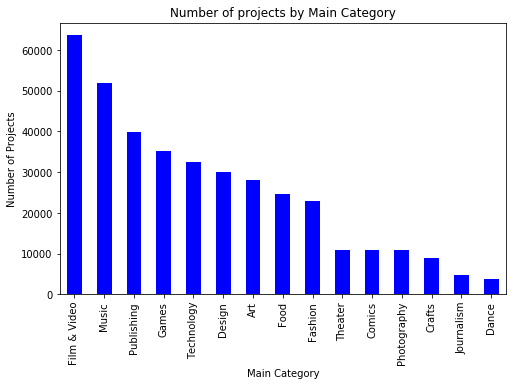

In [8]:
plt.figure(figsize=(8,5))
plt.xlabel('Main Category')
plt.ylabel('Number of Projects')
plt.title('Number of projects by Main Category')
df.main_category.value_counts().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.show()

In [9]:
# Calculate the successful rate of each main category
state_main_category_count = pd.crosstab(df['state'],df['main_category'],margins=True)
state_main_category_rate = (state_main_category_count/state_main_category_count.loc['All']*100).round(2)
state_main_category_rate

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
state,,,,,,,,,,,,,,,,
canceled,7.89,7.78,9.57,4.33,13.81,11.61,9.05,8.99,17.60,11.00,6.37,9.15,9.03,14.48,5.57,10.24
failed,50.19,37.30,64.74,32.78,49.27,62.16,51.75,64.91,45.42,65.97,41.90,59.23,58.05,63.30,33.98,52.22
live,0.69,0.70,0.86,0.48,1.01,1.10,0.52,0.75,0.81,0.65,0.54,0.45,0.75,1.16,0.38,0.74
successful,40.88,54.00,24.01,62.05,35.08,24.51,37.15,24.73,35.53,21.28,46.61,30.66,30.85,19.75,59.87,35.38
suspended,0.34,0.21,0.82,0.35,0.82,0.60,0.18,0.62,0.62,1.09,0.29,0.51,0.17,1.30,0.19,0.49
undefined,0.00,0.00,0.00,0.03,0.01,0.01,1.34,0.00,0.00,0.00,4.30,0.01,1.16,0.01,0.01,0.94
All,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [10]:
# Remove 'All' column and row
state_main_category_rate = state_main_category_rate.drop(['All'],axis=0)
state_main_category_rate = state_main_category_rate.drop(['All'],axis=1)

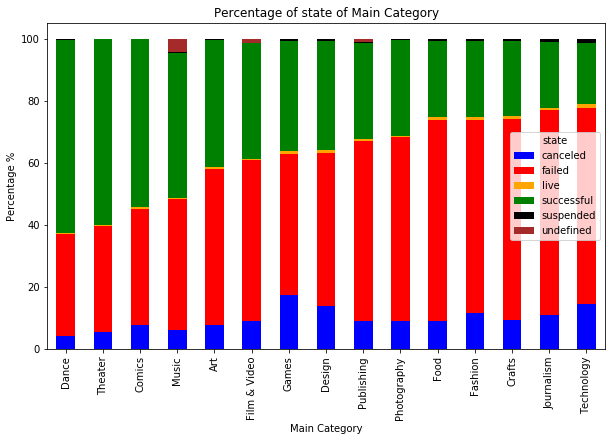

<Figure size 432x288 with 0 Axes>

In [11]:
# Successful rate by main category in descending order
state_main_category_rate.T.sort_values('successful', ascending=False).plot(kind='bar', stacked=True, figsize=(10,6),
                color=['blue','red','orange','green','black','brown'])
plt.title('Percentage of state of Main Category')
plt.xlabel('Main Category')
plt.ylabel('Percentage %')
plt.show()
plt.savefig("D:/Data Science/Figure 3.png")

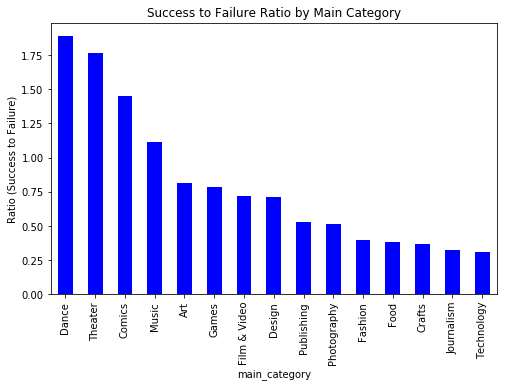

In [12]:
plt.figure(figsize=(8,5))
plt.title('Success to Failure Ratio by Main Category')
plt.ylabel('Ratio (Success to Failure)') 
catPivot = df.pivot_table(index='main_category', columns='state', values='ID', aggfunc='count', margins=False)
catPivot['SFratio'] = catPivot['successful'] / catPivot['failed']
catPivot['SFratio'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.show()

In [13]:
df[df.state=='successful'].groupby(['main_category'])['usd_goal_real'].median()

main_category
Art              2000.00
Comics           2619.71
Crafts           1000.00
Dance            3000.00
Design           7500.00
Fashion          5000.00
Film & Video     5000.00
Food             7343.91
Games            5000.00
Journalism       3000.00
Music            3210.12
Photography      3000.00
Publishing       3000.00
Technology      10000.00
Theater          2650.00
Name: usd_goal_real, dtype: float64

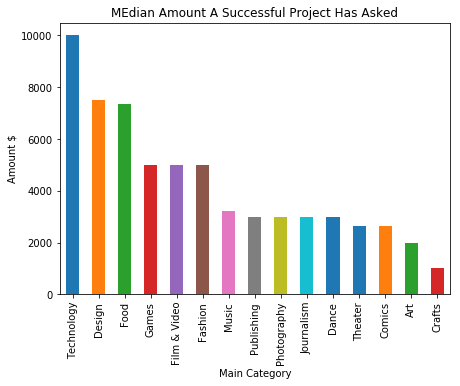

In [14]:
plt.figure(figsize=(7,5))
df[df.state=='successful'].groupby(['main_category'])['usd_goal_real'].median().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Main Category')
plt.ylabel('Amount $')
plt.title('MEdian Amount A Successful Project Has Asked')
plt.show()

In [15]:
mpb= df['$/backer']=df['usd_goal_real']/df['backers']
df[df.state=='successful'].groupby(['main_category'])['$/backer'].median().round(2)

main_category
Art             43.75
Comics          24.82
Crafts          28.21
Dance           62.50
Design          37.72
Fashion         55.56
Film & Video    69.62
Food            66.67
Games           20.73
Journalism      45.45
Music           52.63
Photography     51.61
Publishing      41.96
Technology      50.72
Theater         56.07
Name: $/backer, dtype: float64

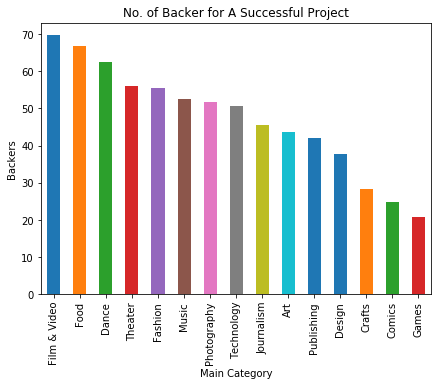

In [16]:
plt.figure(figsize=(7,5))
df[df.state=='successful'].groupby(['main_category'])['$/backer'].median().sort_values(ascending=False).plot(kind= 'bar')

plt.xlabel('Main Category')
plt.ylabel('Backers')
plt.title('No. of Backer for A Successful Project')
plt.show()

In [17]:
# Convert launched and deadline to datatime
from datetime import datetime
df['deadline'] = [datetime.strptime(x, '%Y-%m-%d') for x in df.deadline]
df['launched'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df.launched]

In [18]:

# Create columns to store year, month, day, duration
#
df['duration'] = (df.loc[:, 'deadline'] - df.loc[:, 'launched']).apply(lambda l: l.days)
df['launched_month'] = df.loc[:, 'launched'].apply(lambda l: l.month)
df['launched_year'] = df.loc[:, 'launched'].apply(lambda l: l.year)
df['launched_day'] = df.loc[:, 'launched'].apply(lambda l: l.dayofyear)
df['deadline_month'] = df.loc[:, 'deadline'].apply(lambda l: l.month)
df['deadline_year'] = df.loc[:, 'deadline'].apply(lambda l: l.year)
df['deadline_day'] = df.loc[:, 'deadline'].apply(lambda l: l.dayofyear)
df['duration_5'] = np.ceil(df.loc[:, 'duration'] / 5) * 5
df['succeed'] = np.where(df['state'] == 'successful', 1, 0)
df['log10_usd_goal_real'] = np.log10(df['usd_goal_real'])

In [19]:
years_values = sorted(df.loc[:, 'launched_year'].unique())
for year in years_values:
    month_values = sorted(df[df['launched_year']==year].loc[:, 'launched_month'].unique())
    print (year, month_values)

1970 [1]
2009 [4, 5, 6, 7, 8, 9, 10, 11, 12]
2010 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2011 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2012 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2013 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2015 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2016 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2018 [1]


In [20]:
# Set the values of year for analysis
years_values = [2010,2011,2012,2013,2014,2015,2016,2017]

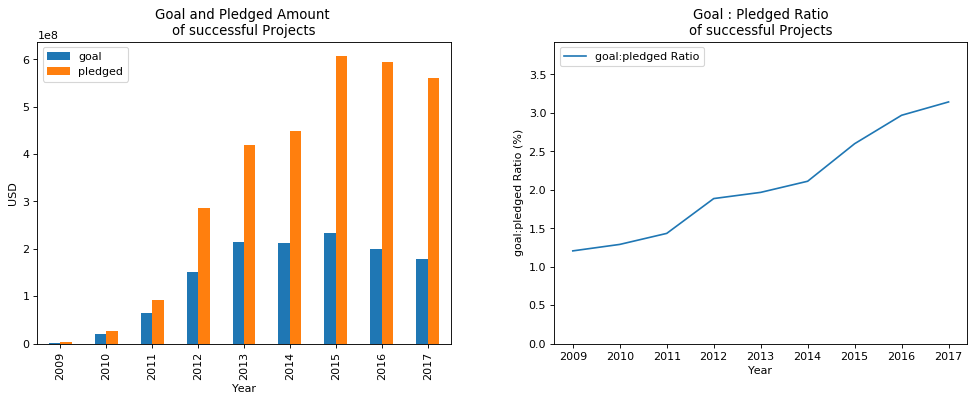

In [21]:
# Compare the Goal and Pledged amount by year and calculate the ratio
#
yearFund = df[df['state']=='successful'].groupby(['launched_year'])['usd_goal_real','usd_pledged_real'].sum() 
goal_pledged_ratio = yearFund['usd_pledged_real'] / yearFund['usd_goal_real']

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .25)

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Goal and Pledged Amount \nof successful Projects')

yearFund.plot.bar(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('USD')
# ax1.set_ylim(0,yaxis_lim)
ax1.legend(['goal','pledged'], loc=2)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Goal : Pledged Ratio\nof successful Projects')
ax2.set_ylabel('goal:pledged Ratio (%)')
ax2.set_xlabel('Year')
#ax2.set_ylim(min=0)
ax2.set_ylim(ymin=0, ymax=max(goal_pledged_ratio.values)*1.25)
ax2.plot(goal_pledged_ratio)
ax2.legend(['goal:pledged Ratio'], loc=2)

plt.show()

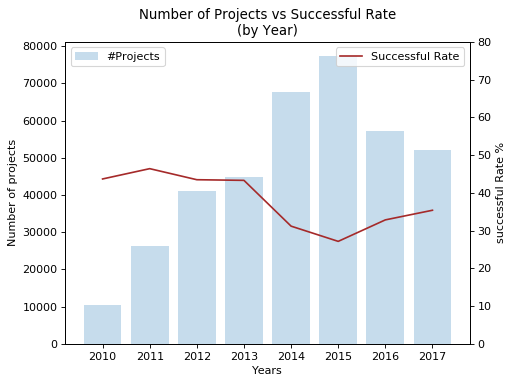

In [22]:
# to compare the number of launched project and the succesful rate by year

project_year_count = df.launched_year.value_counts().sort_index(ascending=True)
project_year_count = project_year_count[years_values]

state_year_count = pd.crosstab(df['state'],df['launched_year'],margins=True)
state_year_rate = (state_year_count/state_year_count.loc['All']*100).round(2)
state_year_rate = state_year_rate.drop(['All']).drop(['All'],axis=1)
state_year_success_rate = state_year_rate.loc['successful', years_values]

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .3)

ax1 = plt.subplot(1, 2, 1)
plt.title('Number of Projects vs Successful Rate\n(by Year)')

ax2 = ax1.twinx()
ax1.bar(project_year_count.index, project_year_count.values, alpha = 0.25)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of projects')
ax1.legend(['#Projects'], loc=2)

ax2.set_ylabel('successful Rate %')
ax2.set_ylim(0,80)
ax2.plot(years_values, state_year_success_rate.values, color = 'brown')
ax2.legend(['Successful Rate'], loc=1)

plt.show()

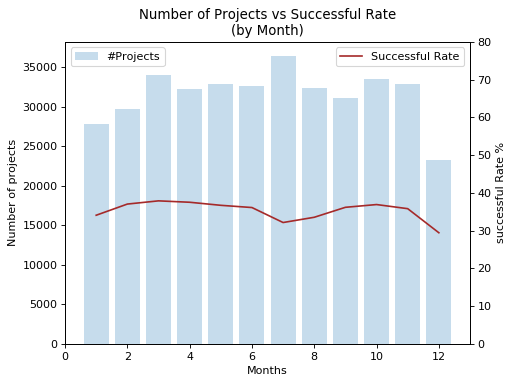

In [23]:
# to compare the number of launched project and the succesful rate by month

project_month_count = df.launched_month.value_counts().sort_index(ascending=True)
# project_month_count = project_month_count[years_values]

state_month_count = pd.crosstab(df['state'],df['launched_month'],margins=True)
state_month_rate = (state_month_count/state_month_count.loc['All']*100).round(2)
state_month_rate = state_month_rate.drop(['All']).drop(['All'],axis=1)
state_month_success_rate = state_month_rate.loc['successful']

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .3)

ax1 = plt.subplot(1, 2, 1)
plt.title('Number of Projects vs Successful Rate\n(by Month)')

ax2 = ax1.twinx()
ax1.bar(project_month_count.index, project_month_count.values, alpha = 0.25)
ax1.set_xlabel('Months')
ax1.set_ylabel('Number of projects')
ax1.legend(['#Projects'], loc=2)

ax2.set_ylabel('successful Rate %')
ax2.set_ylim(0,80)
ax2.plot(state_month_success_rate, color = 'brown')
ax2.legend(['Successful Rate'], loc=1)

plt.show()

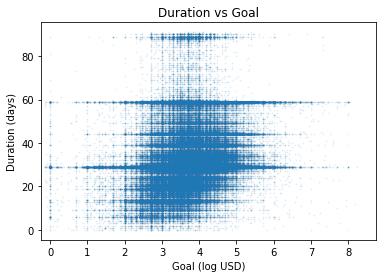

In [24]:
# duration vs goal
#
df[df['duration']<=100].plot(kind='scatter', x='log10_usd_goal_real', y='duration', s=0.5, alpha=0.1)
plt.xlim(-0.25)
plt.title('Duration vs Goal')
plt.xlabel('Goal (log USD)')
plt.ylabel('Duration (days)')
plt.show()

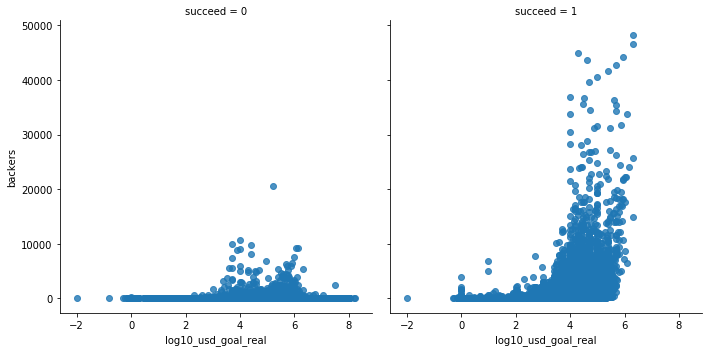

In [25]:
sns.lmplot(x = 'log10_usd_goal_real', y = 'backers', col ='succeed', data = df[df.backers<50000], fit_reg = False) 
plt.show()

In [26]:
output_folder = "D:/Data Science/Jason Analysis"

In [27]:
def calculate_categorical_data_success_rates(data, category):
    category_data = data[['state'] + category]
    #print(category_data)
    
    category_totals = category_data.groupby(category).size()
    category_survival_totals = category_data[category_data.state == 'successful'].groupby(category).size()
    
    append_zero_for_missing_indices(category_totals, category_survival_totals)
    
    survival_rates = category_survival_totals/category_totals
    survival_rates.name = "Success Rates"
    
    print(survival_rates)
    return survival_rates

def append_zero_for_missing_indices(data1, data2):
    missing_indices = data1.index.difference(data2.index)
    for index in missing_indices:
        data2.loc[index] = 0
        
def plot_success_rate(data, column, xsize, ysize, filepath):
    success_rate = calculate_categorical_data_success_rates(data, column)
    fig = plt.figure(figsize=(xsize,ysize))
    success_rate.plot.bar(yticks=[0,0.2,0.4,0.6,0.8,1.0])
    plt.savefig(fname=filepath)

In [28]:
def calculate_numerical_data_survival_rates(data, category, minimum, maximum, number_intervals):
    #survival_header = 'Survived'
    category_data = data[['state',category]]
    #survivors_data = category_data[category_data[survival_header]==1]
    #survivors_data = get_survivor_rows(category_data)
    survivors_data = category_data[category_data['state'] == 'successful']
    #print(survived_data)
    
    category_column_totals = category_data[category]
    category_column_survivors = survivors_data[category]
    
    bins = np.linspace(minimum, maximum, number_intervals+1, endpoint=True)

    cats_totals = pd.cut(category_column_totals, bins)
    cats_survivors = pd.cut(category_column_survivors, bins)
    
    tally_survivors = pd.value_counts(cats_survivors)
    tally_totals = pd.value_counts(cats_totals)
    
    tally_survivors.name = 'Success Totals'
    print(tally_survivors)
    
    tally_totals.name ="Totals" 
    print(tally_totals)
    
    survival_rates = tally_survivors/tally_totals
    survival_rates = survival_rates.apply(lambda s: 0 if np.isnan(s) or np.isinf(s) else s)
    survival_rates.name = "Success Rates"
    
    print("max success rate " + str(survival_rates.max()))
    #index = survival_rates.idxmax()
    #print("interval with max success rate " + str(index))
    data = pd.DataFrame()
    data['success_total'] = tally_survivors
    data['total'] = tally_totals
    data['rate'] = survival_rates
    
    print("intervals with max success rate:")
    print(data[data['rate'] == data['rate'].max()])
    
    data_filter = data[data['rate'] != data['rate'].max()]
    print("intervals with second max success rate:")
    print(data_filter[data_filter['rate'] == data_filter['rate'].max()])
    
    data_filter2 = data_filter[data_filter['rate'] != data_filter['rate'].max()]
    print("intervals with third max success rate:")
    print(data_filter2[data_filter2['rate'] == data_filter2['rate'].max()])
    
    return survival_rates

def get_ceil_of_max(data, category):
    return math.ceil(data[category].max(0))

def get_floor_of_min(data, category):
    return math.floor(data[category].min(0))

def plot_success_rate_numerical(data, column, minimum, maximum, number_intervals, xsize, ysize, filepath):
    success_rate = calculate_numerical_data_survival_rates(data, column, minimum, maximum, number_intervals)
    fig = plt.figure(figsize=(xsize,ysize))
    success_rate.plot.bar(yticks=[0,0.2,0.4,0.6,0.8,1.0])
    plt.savefig(fname=filepath)

In [29]:
def correlation_scatterplot(data, col1, col2, filepath):
    print("correlation:" + str(data[col1].corr(data[col2])))
    sns.lmplot(x=col1,y=col2,data=data,fit_reg=True)
    plt.savefig(filepath)

In [30]:
df2 = df.copy()
df2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,duration,launched_month,launched_year,launched_day,deadline_month,deadline_year,deadline_day,duration_5,succeed,log10_usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,...,58,8,2015,223,10,2015,282,60.0,0,3.185811
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,...,59,9,2017,245,11,2017,305,60.0,0,4.477121
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,...,44,1,2013,12,2,2013,57,45.0,0,4.653213
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,...,29,3,2012,77,4,2012,107,30.0,0,3.698970
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,...,55,7,2015,185,8,2015,241,55.0,0,4.290035
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,...,34,2,2016,57,4,2016,92,35.0,1,4.698970
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,...,19,12,2014,335,12,2014,355,20.0,1,3.000000
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,...,44,2,2016,32,3,2016,77,45.0,0,4.397940
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,...,34,4,2014,114,5,2014,149,35.0,0,5.096910
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,...,29,7,2014,192,8,2014,222,30.0,0,4.812913


In [31]:
df2['deadline_date'] = pd.to_datetime(df2['deadline'], format="%Y-%m-%d")
df2['launched_date'] = pd.to_datetime(df2['launched'], format="%Y-%m-%d %H:%M:%S")
df2['timedelta'] = df2['deadline_date'] - df2['launched_date']
df2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,launched_day,deadline_month,deadline_year,deadline_day,duration_5,succeed,log10_usd_goal_real,deadline_date,launched_date,timedelta
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,...,223,10,2015,282,60.0,0,3.185811,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,...,245,11,2017,305,60.0,0,4.477121,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,...,12,2,2013,57,45.0,0,4.653213,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,...,77,4,2012,107,30.0,0,3.698970,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,...,185,8,2015,241,55.0,0,4.290035,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,...,57,4,2016,92,35.0,1,4.698970,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,...,335,12,2014,355,20.0,1,3.000000,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,...,32,3,2016,77,45.0,0,4.397940,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,...,114,5,2014,149,35.0,0,5.096910,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,...,192,8,2014,222,30.0,0,4.812913,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12


In [32]:
df2['timedelta_days'] = df2['timedelta'].dt.days # total_seconds
print(df2['timedelta'].min())
print(df2['timedelta'].max())
df2[df2['timedelta'].max()==df2['timedelta']]

0 days 00:07:17
16738 days 23:00:00


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,deadline_month,deadline_year,deadline_day,duration_5,succeed,log10_usd_goal_real,deadline_date,launched_date,timedelta,timedelta_days
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,...,10,2015,304,16740.0,0,3.280116,2015-10-31,1970-01-01 01:00:00,16738 days 23:00:00,16738


In [33]:
df2['pledged_ratio'] = df2['usd_pledged_real']/df2['usd_goal_real']
print(df2['timedelta'])

0        58 days 11:47:32
1        59 days 19:16:03
2        44 days 23:39:10
3        29 days 20:35:49
4        55 days 15:24:57
5        34 days 10:21:33
6        19 days 05:29:16
7        44 days 03:54:48
8        34 days 05:45:17
9        29 days 02:04:12
10       29 days 05:40:23
11       29 days 17:17:02
12       29 days 06:48:10
13       44 days 00:58:48
14       27 days 04:15:42
15       29 days 21:49:07
16       29 days 01:32:08
17       29 days 02:39:06
18       14 days 09:48:28
19       29 days 06:35:28
20       34 days 16:53:49
21       29 days 22:39:40
22       29 days 13:49:22
23       29 days 04:42:27
24       19 days 06:44:10
25       29 days 00:43:10
26       29 days 03:50:54
27       29 days 05:58:00
28       29 days 07:00:31
29       29 days 06:48:27
               ...       
378631   29 days 04:06:10
378632   29 days 00:09:26
378633   29 days 06:43:43
378634   60 days 21:16:01
378635   29 days 01:22:46
378636   29 days 06:09:48
378637   44 days 17:02:32
378638   30 

In [34]:
df2['state_ordinal'] = df2['state'].apply(lambda state: 1 if state == 'successful' else 0)
df2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,deadline_day,duration_5,succeed,log10_usd_goal_real,deadline_date,launched_date,timedelta,timedelta_days,pledged_ratio,state_ordinal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,...,282,60.0,0,3.185811,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32,58,0.000000,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,...,305,60.0,0,4.477121,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03,59,0.080700,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,...,57,45.0,0,4.653213,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10,44,0.004889,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,...,107,30.0,0,3.698970,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49,29,0.000200,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,...,241,55.0,0,4.290035,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57,55,0.065795,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,...,92,35.0,1,4.698970,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33,34,1.047500,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,...,355,20.0,1,3.000000,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16,19,1.205000,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,...,77,45.0,0,4.397940,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48,44,0.018120,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,...,149,35.0,0,5.096910,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17,34,0.065864,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,...,222,30.0,0,4.812913,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12,29,0.096009,0


In [35]:
df2['backer_pledge_average'] = df2['usd_pledged_real']/df2['backers']
df2['backer_pledge_average'] = df2['backer_pledge_average'].apply(lambda avg: 0 if np.isnan(avg) or np.isinf(avg) else avg)

In [36]:
df2['backer_pledge_average_percent'] = df2['backer_pledge_average'] / df2['usd_goal_real']

In [37]:
df2['log10_timedelta_days'] = np.log10(df2['timedelta_days'])
df2['log10_backers'] = np.log10(df2['backers'])
df2['log10_backer_pledge_average'] = np.log10(df2['backer_pledge_average'])
df2['log10_backer_pledge_average_percent'] = np.log10(df2['backer_pledge_average_percent'])
df2['log10_usd_goal_real'] = np.log10(df2['usd_goal_real'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


correlation:0.0003937674579422245


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


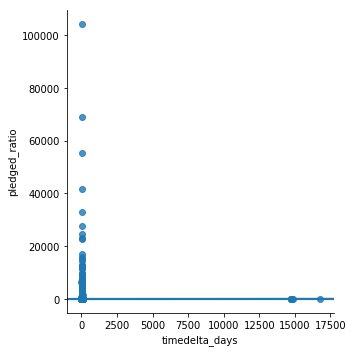

In [38]:
correlation_scatterplot(df2, 'timedelta_days', 'pledged_ratio', output_folder + "time_vs_pledge_ratio_all.png")

In [39]:
df3 = df2[df2['timedelta_days']<10000]

correlation:0.002291862546632913


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


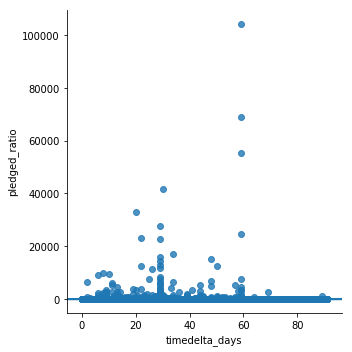

In [40]:
correlation_scatterplot(df3, 'timedelta_days', 'pledged_ratio', output_folder + "time_vs_pledge_ratio_without_outliers.png")

In [41]:
df4 = df2[(df2['timedelta_days']<10000) & (df2['pledged_ratio'] > 1.0)]

correlation:0.007711451191252911


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


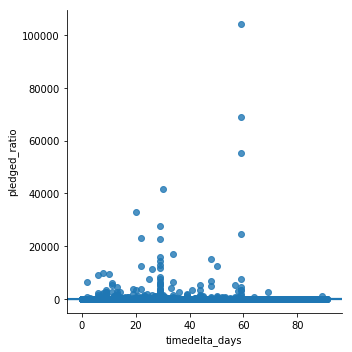

In [42]:
correlation_scatterplot(df4, 'timedelta_days', 'pledged_ratio', output_folder + "time_vs_pledge_ratio_success_cases.png")

In [43]:
print(df2['backers'].max())
print(df2['backers'].min())

219382
0


(25.0, 50.0]            26714
(0.0, 25.0]             24706
(50.0, 75.0]            18417
(75.0, 100.0]           12159
(100.0, 125.0]           8814
(125.0, 150.0]           6102
(150.0, 175.0]           4802
(175.0, 200.0]           3626
(200.0, 225.0]           2952
(225.0, 250.0]           2465
(250.0, 275.0]           2037
(275.0, 300.0]           1632
(300.0, 325.0]           1446
(325.0, 350.0]           1217
(350.0, 375.0]           1142
(375.0, 400.0]            876
(400.0, 425.0]            804
(425.0, 450.0]            722
(450.0, 475.0]            688
(475.0, 500.0]            584
(500.0, 525.0]            559
(525.0, 550.0]            486
(550.0, 575.0]            486
(575.0, 600.0]            464
(600.0, 625.0]            418
(650.0, 675.0]            353
(625.0, 650.0]            346
(675.0, 700.0]            311
(700.0, 725.0]            307
(725.0, 750.0]            299
                        ...  
(146150.0, 146175.0]        0
(146175.0, 146200.0]        0
(146200.0,

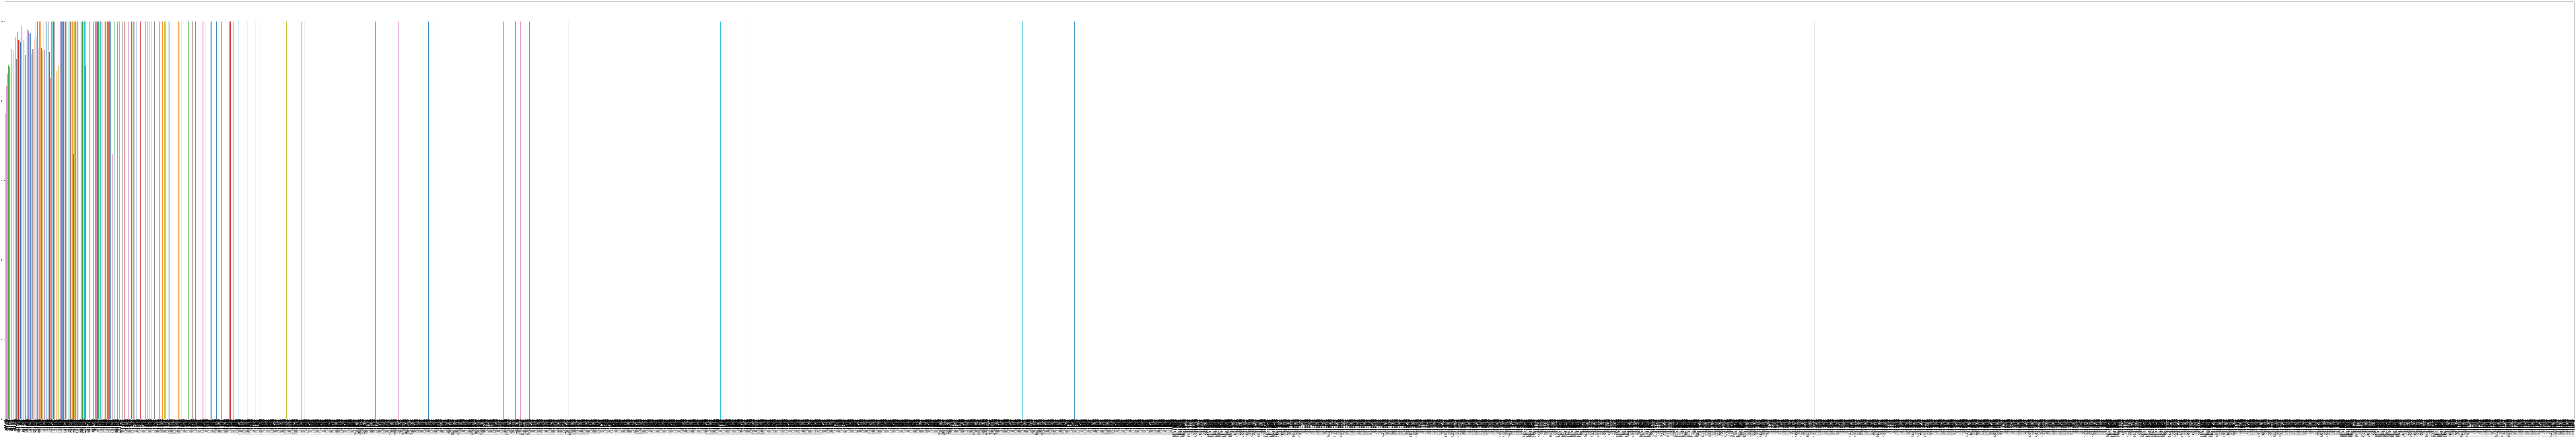

In [44]:
plot_success_rate_numerical(df2, 'backers', 0, 220000, int(220000/25), 300, 50, output_folder +"backers_success_rate.png")

correlation:0.01660524427597695


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


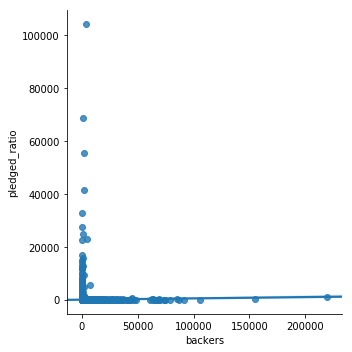

In [45]:
correlation_scatterplot(df2, 'backers', 'pledged_ratio', output_folder + "backers_vs_pledge_ratio.png")